In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def generate_polynomial_features(X, degree):
    m, n = X.shape
    X_poly = np.ones((m, 1))  # Include bias term

    for d in range(1, degree + 1):
        for i in range(n):
           # Include individual powers
            X_poly = np.c_[X_poly, X[:, i]**d]

            # Include cross-terms
            for j in range(i + 1, n):
                X_poly = np.c_[X_poly, X[:, i]**d * X[:, j]**d]

            # Include mixed powers
            for j in range(i + 1, n):
                X_poly = np.c_[X_poly, X[:, i]**d * X[:, j]**(d-1)]
                X_poly = np.c_[X_poly, X[:, j]**d * X[:, i]**(d-1)]



    return X_poly

In [ ]:
def multiple_variable_polynomial_regresssion(X,y,degree,alpha,num_iterations):
  # Performs multiple variable polynomial regression using gradient descent
  m,n=X.shape
  theta=np.zeros((X.shape[1],1))
  for iteration in range(num_iterations):
    error=X@theta-y
    gradients=(X.T@error)/m
    theta=theta-alpha*gradients

    #Print error every 100 iterations
    if iteration%100==0:
      cost=np.sum(error**2)/(2*m) #Mean Squared Error
      print(f"Iteration {iteration}, Error: {cost}")
  return theta

In [ ]:
def r_sqaured(y_true,y_pred):
  #Compute R-sqaured score
  ss_total=np.sum((y_true-np.mean(y_true))**2)
  ss_residual=np.sum((y_true-y_pred)**2)
  r2=1-(ss_residual/ss_total)
  return r2

In [ ]:
df=pd.read_csv('/content/sample_data/Polynomialdata_train.csv')
df

,target,feature 1,feature 2,feature 3
0,4.131528e+06,5.221849,7.295111,95.716846
1,3.172975e-01,-5.106284,4.220085,-6.172360
2,4.676422e+04,-4.218053,-7.573823,-39.493884
3,1.404175e+05,-18.439122,-2.275148,-40.885857
4,4.788988e+03,13.353046,3.103837,18.622367
...,...,...,...,...
49995,1.853922e+04,-25.309264,-6.094516,75.361431
49996,6.379917e+03,-58.016982,-6.064214,27.146387
49997,3.835601e+06,29.857894,1.422973,75.620505
49998,2.580318e+04,10.793146,1.215972,34.437761


In [ ]:
df_np=df.to_numpy()
df_np.shape

(50000, 4)

In [ ]:
X,y=df_np[:,1:],df_np[:,0:1]
X.shape,y.shape

((50000, 3), (50000, 1))

In [ ]:
X

array([[  5.22184894,   7.29511056,  95.71684555],
       [ -5.10628445,   4.22008546,  -6.17236   ],
       [ -4.21805344,  -7.57382297, -39.49388399],
       ...,
       [ 29.85789417,   1.42297302,  75.62050543],
       [ 10.79314567,   1.21597176,  34.43776063],
       [ 12.17170222,  -0.79875632,  60.24598982]])

In [ ]:
y

array([[4.13152828e+06],
       [3.17297454e-01],
       [4.67642163e+04],
       ...,
       [3.83560105e+06],
       [2.58031768e+04],
       [3.46817108e+05]])

In [ ]:
def train_test_split(X,y,test_ratio=0.2,random_seed=None):
  if random_seed is not None:
    np.random.seed(random_seed)
  #Shuffle indices
  indices=np.arange(X.shape[0])
  np.random.shuffle(indices)
  #Calculate the number of samples for testing
  test_size=int(X.shape[0]*test_ratio)
  #Split the data
  test_indices=indices[:test_size]
  train_indices=indices[test_size:]
  X_train,X_test=X[train_indices],X[test_indices]
  y_train,y_test=y[train_indices],y[test_indices]
  return X_train,X_test,y_train,y_test

In [ ]:
#Split the data into training and testing datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_ratio=0.2,random_seed=42)

In [ ]:
X_train.shape,X_test.shape

((40000, 3), (10000, 3))

In [ ]:
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized, mean, std

In [ ]:
X_normalized, mean, std = normalize_features(X_train)

In [ ]:
#Define the degree of the polynomial
degree=4

In [ ]:
#create polynomial features
X_poly = generate_polynomial_features(X_normalized, degree)

In [ ]:
#perform multiple variable polynomial regression using gradient descent
alpha=0.0001 #Learning rate
num_iterations=1000
theta=multiple_variable_polynomial_regresssion(X_poly,y_train,degree,alpha,num_iterations)

Iteration 0, Error: 59078016510125.29
Iteration 100, Error: 16122357210160.525
Iteration 200, Error: 12085193625499.93
Iteration 300, Error: 11329927220212.516
Iteration 400, Error: 11125558191907.678
Iteration 500, Error: 11025412120979.02
Iteration 600, Error: 10948679882465.43
Iteration 700, Error: 10880033841635.082
Iteration 800, Error: 10816226977442.662
Iteration 900, Error: 10756317609035.717


In [ ]:
#Print coefficients
print("Coefficients:",theta)

Coefficients: [[-4.67136992e+04]
 [-2.43145607e+03]
 [ 1.34757893e+04]
 [ 5.05808581e+04]
 [-2.43145607e+03]
 [-4.28498062e+02]
 [-2.43145607e+03]
 [ 2.85005835e+03]
 [-4.28498062e+02]
 [ 2.26338560e+04]
 [-4.28498062e+02]
 [ 2.85005835e+03]
 [ 2.85005835e+03]
 [-1.24565675e+04]
 [ 2.32016231e+03]
 [ 1.88571673e+03]
 [-1.52205793e+03]
 [-1.07567394e+03]
 [ 5.43209945e+03]
 [-1.24018961e+04]
 [-2.83888222e+04]
 [-8.73831617e+04]
 [-3.92317792e+02]
 [-5.37888735e+03]
 [-7.26564066e+04]
 [ 6.58783993e+03]
 [ 1.01311755e+04]
 [ 3.73915506e+05]
 [-4.40132632e+03]
 [-4.33478469e+03]
 [ 3.25580182e+04]
 [-5.47288860e+04]
 [-2.79008187e+03]
 [ 4.42578269e+04]
 [-1.55791827e+04]
 [ 1.24362494e+04]
 [-4.26059826e+04]
 [-5.92323256e+02]
 [ 1.40100250e+03]
 [ 3.00441766e+04]
 [ 3.35105754e+03]
 [ 7.37759127e+02]
 [ 1.31780207e+04]
 [-9.59033104e+03]
 [-5.34674170e+03]
 [ 6.09592315e+02]
 [ 4.25572038e+02]
 [ 4.04056147e+03]
 [ 7.85055035e+05]]


In [ ]:
y_train

array([[1.72884503e+04],
       [2.79985499e+03],
       [7.00879942e+04],
       ...,
       [6.99938671e+06],
       [1.29964362e+00],
       [1.31345652e+06]])

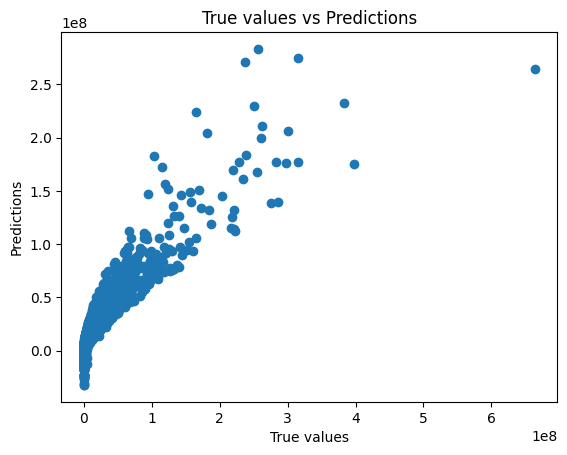

In [ ]:
#Plot the true values vs predicted values
y_pred=X_poly @theta
plt.scatter(y_train,y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('True values vs Predictions')
plt.show()

In [ ]:
#Compute R-squared
r2=r_sqaured(y_train,y_pred)
print("R2 Score:",r2)

R2 Score: 0.814010224089485


In [ ]:
#Making predictions on the test data
X_normalized_test, mean, std = normalize_features(X_test)

In [ ]:
#create polynomial features
X_poly_test = generate_polynomial_features(X_normalized_test, degree)

In [ ]:
#perform multiple variable polynomial regression using gradient descent
alpha=0.0001 #Learning rate
num_iterations=1000
theta=multiple_variable_polynomial_regresssion(X_poly_test,y_test,degree,alpha,num_iterations)

Iteration 0, Error: 96141255628943.61
Iteration 100, Error: 28089367792127.848
Iteration 200, Error: 22203754499194.113
Iteration 300, Error: 20748844357948.344
Iteration 400, Error: 20142643438628.363
Iteration 500, Error: 19739231489710.637
Iteration 600, Error: 19407391984621.62
Iteration 700, Error: 19115373293304.027
Iteration 800, Error: 18852565564899.125
Iteration 900, Error: 18613673199371.11


In [ ]:
y_pred_test=X_poly_test @theta

In [ ]:
#Compute R-squared for the test value
r2=r_sqaured(y_test,y_pred_test)
print("R2 Score:",r2)

R2 Score: 0.8052817171547013
